In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import time_evolutor as te
import plotting as p

import sys
sys.path.append('/../../temp_prog/')
import tur_calculator as tc



In [2]:
#------------------SETUP-------------------

T_L = 2.5 #2.5
T_R = 1
V_B = 0.2 #0.2
eps = 3 #1.5

INPUT = {
    'eps': eps,
    'omega': 0.002, 
    'u_intra': 200, 
    'u_inter': 100, 
    'V_B': V_B,
    'gammaL': 0.005, 
    'gammaR': 0.005, 
    'T_L': T_L,
    'T_R': T_R,
}

initial = np.zeros(70)
initial[0] = 1          #beginns with both QDs empty
ti_array = np.linspace(0,200000,500)

In [3]:
importlib.reload(te)
sys, rho_ss, rho_t, I_ss, I, I_var, P, J_QH = te.calculate_meta(initial, ti_array, **INPUT)

[[ 1. -0.  0. ... -0. -0.  0.]
 [ 0.  1.  0. ... -0. -0.  0.]
 [ 0. -0.  1. ...  0. -0. -0.]
 ...
 [ 0.  0.  0. ...  1. -0. -0.]
 [-0. -0. -0. ...  0.  1. -0.]
 [-0. -0.  0. ... -0. -0.  1.]]
dim 70
I_ss:  0.0010595870393551295
right lead?  -0.0010595870393551306


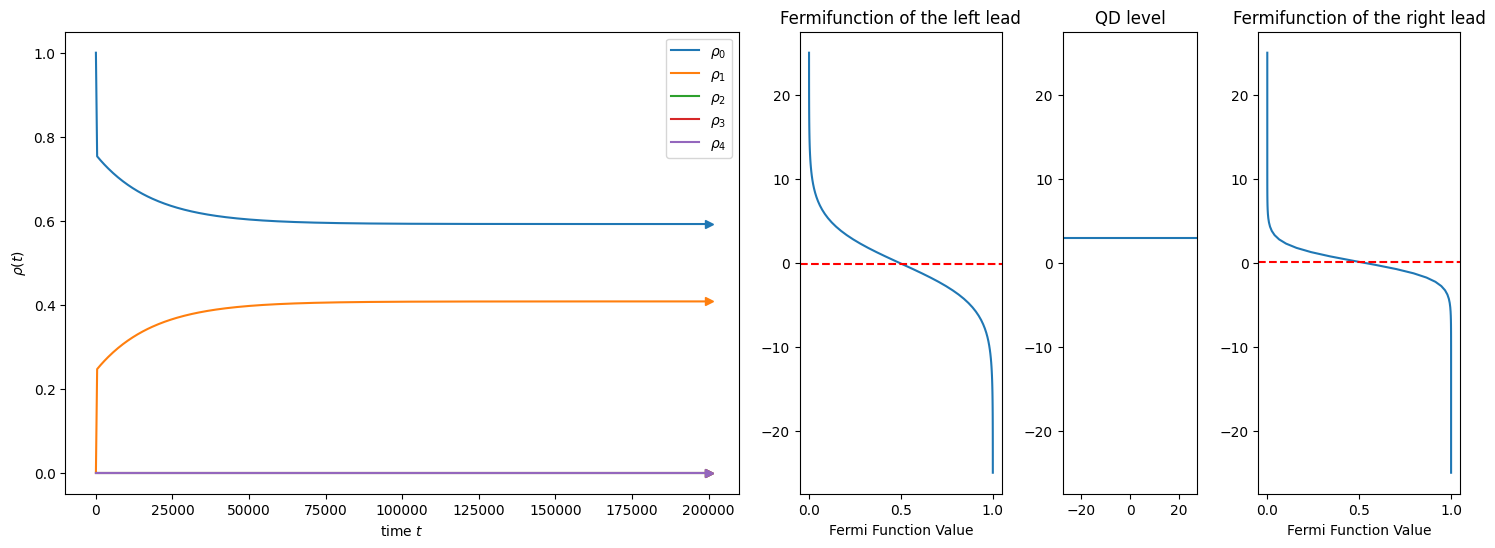

In [4]:
#EVOLUTION OF DIAGONAL COMPONENTS
importlib.reload(p)
p.plot_rho(ti_array, rho_t, sys, eps, V_B, T_L, T_R)

0.0010595870393551295


Text(0, 0.5, '$I(t)$')

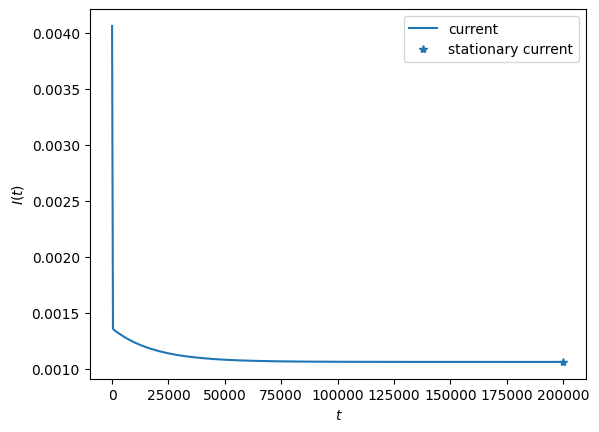

In [5]:
#plotting particle current
print(I_ss)

plt.plot(ti_array,I, label = 'current')
plt.plot(ti_array[-1], I_ss, '*', color = 'C0', label='stationary current')

plt.legend()

plt.xlabel(r' $t$')
plt.ylabel(r'$I(t)$')

In [6]:
importlib.reload(tc)
TUR, eff_carnot, eff, sigma = tc.calculate_tur(T_L, T_R, I, I_var, J_QH, P)

In [7]:
print([0])

[0]


Text(0.5, 1.0, 'Current')

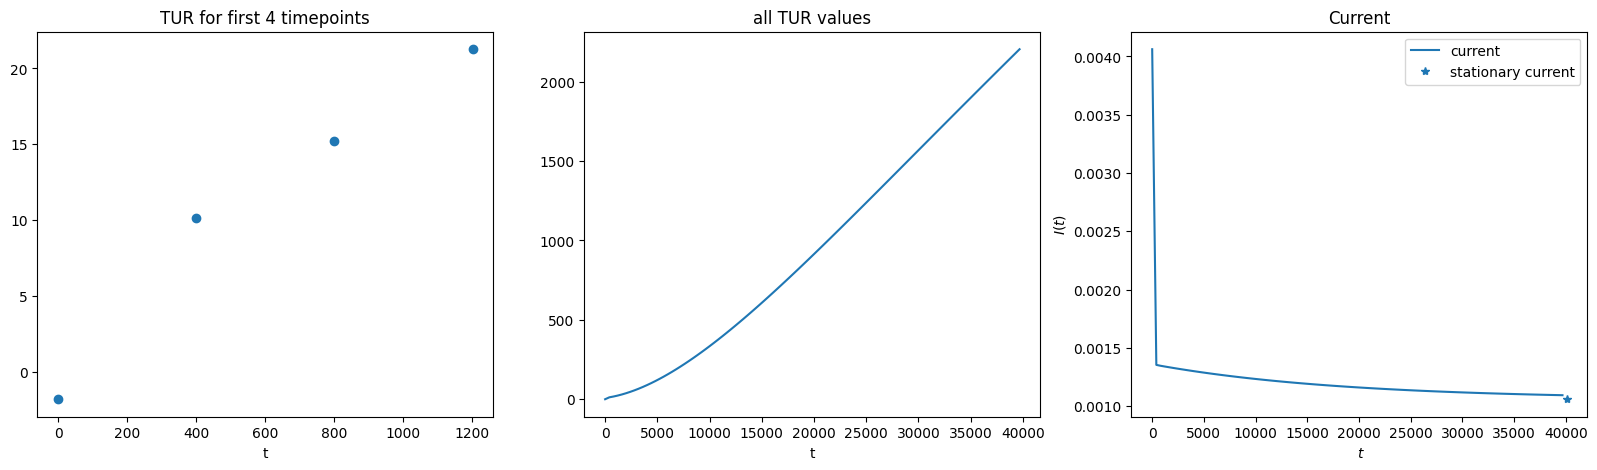

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

TUR_masked = np.ma.masked_where(TUR >= 2, TUR)
axes[0].scatter(ti_array[0:4], TUR[0:4])
axes[0].set_title('TUR for first 4 timepoints')
axes[0].set_xlabel('t')

axes[1].plot(ti_array[0:100], TUR[0:100])
axes[1].set_title('all TUR values')
axes[1].set_xlabel('t')


axes[2].plot(ti_array[0:100],I[0:100], label = 'current')
axes[2].plot(ti_array[100], I_ss, '*', color = 'C0', label='stationary current')

axes[2].legend()

axes[2].set_xlabel(r' $t$')
axes[2].set_ylabel(r'$I(t)$')
axes[2].set_title('Current')


In [9]:
print(np.min(TUR))
print(TUR[0])

-1.7994474215038554
-1.7994474215038554
